<a href="https://colab.research.google.com/github/sketchydough/Pytorch-DL-Practice/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#perceptron using python, numpy, matplotlib

"""
s1:generate two groups of data points, each representing a diff class
s2:perceptron model will classify new points as either class 0 or class 1, depending on which side of the decision boundary they fall in
s3:visualize
"""

'\ns1:generate two groups of data points, each representing a diff class\ns2:perceptron model will classify new points as either class 0 or class 1, depending on which side of the decision boundary they fall in\ns3:visualize\n'

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#generating synthetic data
np.random.seed(0)
num_samples=100

#class 0: centered around (1,1)
x0=np.random.randn(num_samples,2) + [1,1]
y0=np.zeros(num_samples)

#class1: centered around (3,3)
x1=np.random.randn(num_samples,2) +[3,3]
y1=np.ones(num_samples)

In [34]:
#combine
x=np.vstack((x0,x1))
y=np.hstack((y0,y1))

#add bias term to input
x_bias=np.c_[np.ones(x.shape[0]),x] #shape:(200,3)->200 samples and 3 features:bias,x1,x2

#initialize weights randomly
weights=np.random.randn(3) * 0.01
learning_rate=0.2
epochs=50

In [35]:
#Train using perceptron update rule

for epoch in range(epochs):
  for i in range(len(x_bias)):
    z=np.dot(weights,x_bias[i]) #weighted sum
    prediction=1 if z>0 else 0
    error=y[i] - prediction
    weights +=learning_rate*error*x_bias[i]

final weights: [-1.00598654  0.62887237  0.83713522]


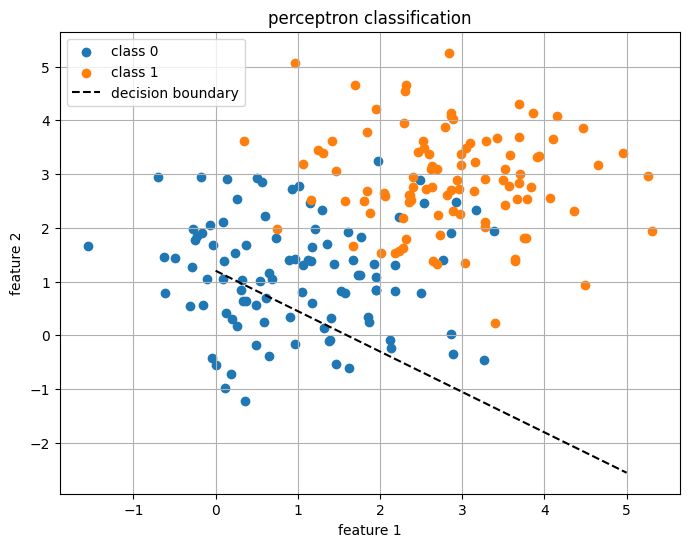

In [36]:
#plotting

print("final weights:",weights)

plt.figure(figsize=(8,6))
plt.scatter(x0[:,0],x0[:,1], label="class 0")
plt.scatter(x1[:,0],x1[:,1], label="class 1")

#plot decision boundary
x_vals=np.array([0,5])
y_vals=-(weights[0]+ weights[1] * x_vals) / weights[2]
plt.plot(x_vals,y_vals,'k--',label="decision boundary")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("perceptron classification")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
#My remarks: not such a good output. Clearly the decision boundary is far off!